# Remote Work vs Travel Data

In [1]:
# Imports:
import pprint, json, csv, os.path as path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests 
import hvplot.pandas
import numpy as np

In [2]:
allcrimedata = pd.read_csv("Resources/crime.csv")


In [3]:
allcrimedata["DATE OCC"]=pd.to_datetime(allcrimedata["DATE OCC"])
allcrimedata["Date Rptd"]=pd.to_datetime(allcrimedata["Date Rptd"])
allcrimedata['Year Crime Occured'] = allcrimedata['DATE OCC'].dt.year
allcrimedata = allcrimedata[allcrimedata['Year Crime Occured'].between(2020,2022)]
#automatically dropped 2023 data

In [4]:
crime_data_2020 = allcrimedata.loc[(allcrimedata['DATE OCC'] >= '2020-01-01')
                     & (allcrimedata['DATE OCC'] < '2020-12-31')]

In [5]:
crime_data_2020.to_csv("Resources/crime_data_2020")

In [5]:
crime_data_2021 = allcrimedata.loc[(allcrimedata['DATE OCC'] >= '2021-01-01')
                     & (allcrimedata['DATE OCC'] < '2021-12-31')]

In [7]:
crime_data_2021.to_csv("Resources/crime_data_2021")

In [6]:
crime_data_2022 = allcrimedata.loc[(allcrimedata['DATE OCC'] >= '2022-01-01')
                     & (allcrimedata['DATE OCC'] < '2022-12-31')]

In [32]:
crime_data_2022.to_csv("Resources/crime_data_2022")

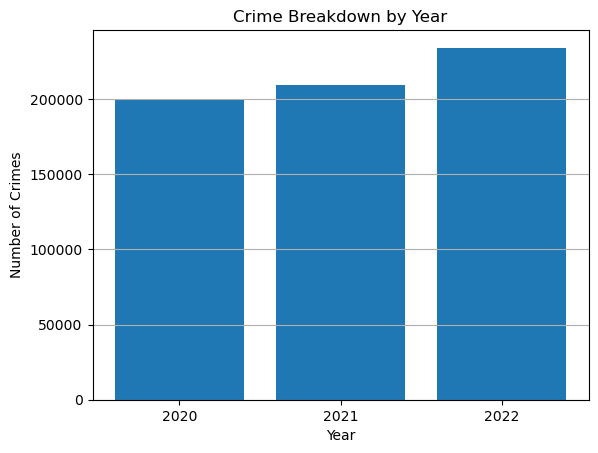

In [7]:
x = allcrimedata.groupby('Year Crime Occured',as_index=False).count()
y = x[['Year Crime Occured', 'DR_NO']].sort_values(by='Year Crime Occured')

plt.bar(x['Year Crime Occured'], y['DR_NO'])
plt.title("Crime Breakdown by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks([2020, 2021, 2022])
plt.grid(axis='y')
plt.show()

In [8]:
crime_data_2020['Month Crime Occured'] = crime_data_2020['DATE OCC'].dt.month
crime2020 = crime_data_2020[crime_data_2020['Month Crime Occured'].between(1,12)]

C:\Users\samca\AppData\Local\Temp\ipykernel_12860\3497852092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_2020['Month Crime Occured'] = crime_data_2020['DATE OCC'].dt.month


In [9]:
crime_data_2021['Month Crime Occured'] = crime_data_2021['DATE OCC'].dt.month
crime2021 = crime_data_2021[crime_data_2021['Month Crime Occured'].between(1,12)]

C:\Users\samca\AppData\Local\Temp\ipykernel_12860\159952374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_2021['Month Crime Occured'] = crime_data_2021['DATE OCC'].dt.month


In [10]:
crime_data_2022['Month Crime Occured'] = crime_data_2022['DATE OCC'].dt.month
crime2022= crime_data_2022[crime_data_2022['Month Crime Occured'].between(1,12)]

C:\Users\samca\AppData\Local\Temp\ipykernel_12860\877110807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_2022['Month Crime Occured'] = crime_data_2022['DATE OCC'].dt.month


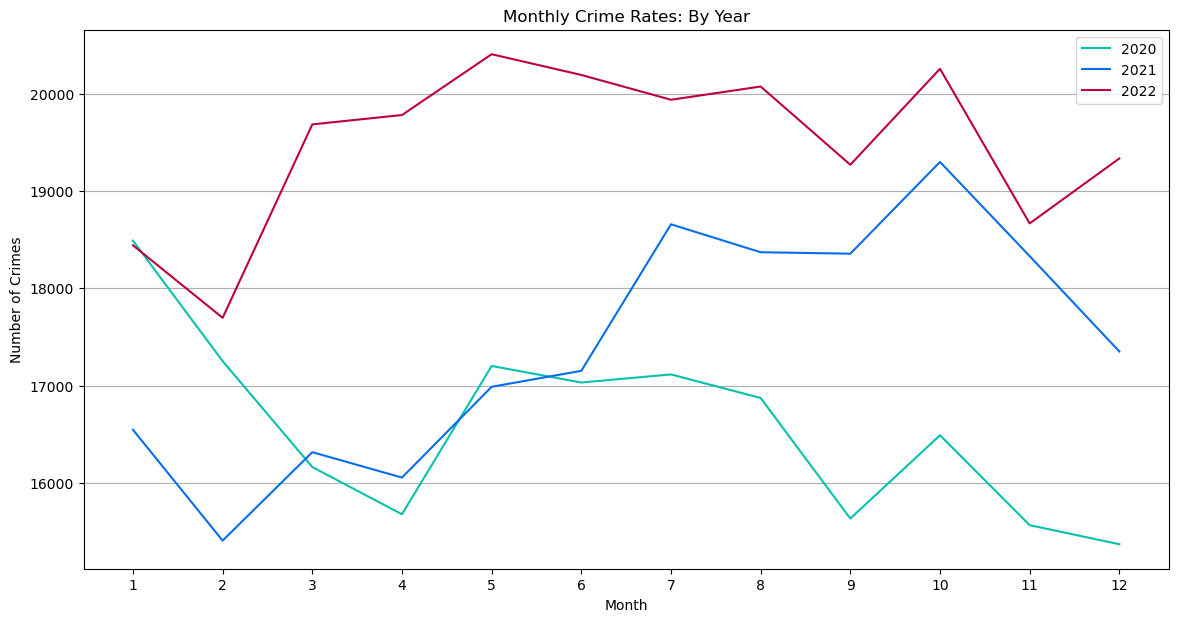

In [41]:
a = crime2020.groupby('Month Crime Occured',as_index=False).count()
b = a[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')
c = crime2021.groupby('Month Crime Occured',as_index=False).count()
d = c[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')
e = crime2022.groupby('Month Crime Occured',as_index=False).count()
f = e[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.figure(figsize = (14,7))
width = 0.25
bar1=plt.plot(a['Month Crime Occured'], b['DR_NO'],  color='xkcd:turquoise', label='2020')
bar2=plt.plot(c['Month Crime Occured'], d['DR_NO'], color='xkcd:cerulean blue', label='2021')
bar3 =plt.plot(e['Month Crime Occured'], f['DR_NO'],  color='xkcd:rose red', label='2022')
plt.title("Monthly Crime Rates: By Year")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend()
plt.grid(axis='y')
plt.show()

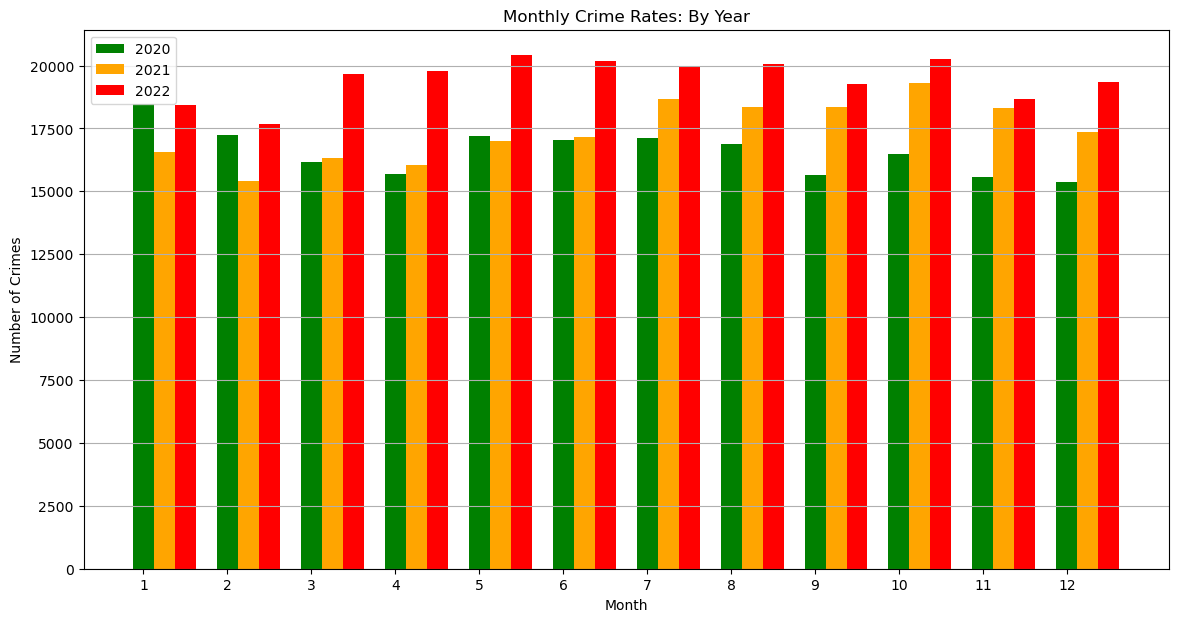

In [12]:
a = crime2020.groupby('Month Crime Occured',as_index=False).count()
b = a[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')
c = crime2021.groupby('Month Crime Occured',as_index=False).count()
d = c[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')
e = crime2022.groupby('Month Crime Occured',as_index=False).count()
f = e[['Month Crime Occured', 'DR_NO']].sort_values(by='Month Crime Occured')

plt.figure(figsize = (14,7))
width = 0.25
bar1=plt.bar(a['Month Crime Occured'], b['DR_NO'], width, color='green', label='2020')
bar2=plt.bar(c['Month Crime Occured']+width, d['DR_NO'], width, color='orange', label='2021')
bar3 =plt.bar(e['Month Crime Occured']+width*2, f['DR_NO'], width, color='red', label='2022')
plt.title("Monthly Crime Rates: By Year")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()

In [18]:
#pulling only ID Theft 2021
ID_theft2021 = crime2021.loc[crime2021["Crm Cd Desc"] == 'THEFT OF IDENTITY',:]
#seeing max and min age in data set
max_age = ID_theft2021['Vict Age'].max()
min_age= ID_theft2021['Vict Age'].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")
#seeing how many rows are age -1 to 0
age_zero = ID_theft2021.loc[ID_theft2021["Vict Age"] < 1,:]
print(len(age_zero))
#just want ages >1
ID_theft2021 = ID_theft2021.loc[ID_theft2021["Vict Age"] >1,:]

max age: 99
min age: -1
294


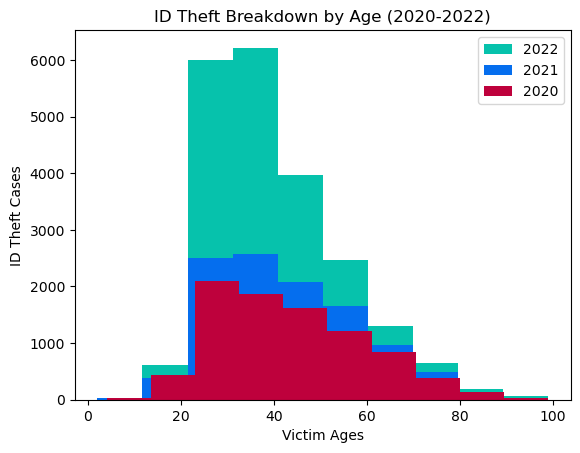

NormaltestResult(statistic=436.1279734065009, pvalue=1.9770327927618443e-95)
NormaltestResult(statistic=570.9714551447133, pvalue=1.0354374132183306e-124)
NormaltestResult(statistic=2514.57917628498, pvalue=0.0)


In [42]:
age2020 = ID_theft2020['Vict Age']
mean_numpy = np.mean(age2020)
median_numpy = np.median(age2020)
mode_scipy = st.mode(age2020)

age2021=ID_theft2021['Vict Age']
mean_numpy = np.mean(age2021)
median_numpy = np.median(age2021)
mode_scipy = st.mode(age2021)

age2022=ID_theft2022['Vict Age']
mean_numpy = np.mean(age2022)
median_numpy = np.median(age2022)
mode_scipy = st.mode(age2022)

hist3= plt.hist(age2022, stacked=True, color='xkcd:turquoise', label='2022')
hist2 =plt.hist(age2021, stacked=True, color='xkcd:cerulean blue', label= '2021')
hist1 =plt.hist(age2020, stacked=True, color='xkcd:rose red', label= '2020')
plt.title('ID Theft Breakdown by Age (2020-2022)')
plt.xlabel('Victim Ages')
plt.ylabel('ID Theft Cases')
plt.legend()
plt.show()
print(st.normaltest(age2020))
print(st.normaltest(age2021))
print(st.normaltest(age2022))